# Assignment 1: Data Exploration and Classification

<strong style="color: red;">Due date: 23rd, January, 2025</strong>

## Introduction
In this assignment, you will implement a data preprocessing pipeline to explore textual data, and another to perform text classification. The assignment is designed in a way where each part and its component are independent, whenever possible. Hence, if you feel stuck in one section, you can move to the next.

### Requirements
In order execute this notebook you will need to have `python >= 3.9` installed on your machine. As for dependencies, you will need:  
- [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook), to run this notebook.
- [scikit-learn](https://scikit-learn.org/stable/install.html), to train the classical ML models needed in Part 2 of the assignment.
- [pandas](https://pandas.pydata.org/docs/getting_started/install.html)


### Rubric
Part 1 (10 points):  
- Data Preprocessing (5 points):  
  - Tokenization (4 points):
    - Basic operation (0.5 point)  
    - Handling punctuation marks and brackets (0.5 point)
    - Handling numeric values and arithmetic operations (0.5 point)
    - Handling contractions (2.5 point)
  - Stopwords removal (0.5 point)
  - Special characters removal (0.5 point)
- Data Visualization (5 points):  
  - Frequency-based visualization (2 points)
  - TF-IDF based visualization (3 points)

Part 2 (10 points):  
- Data preprocessing (1 point)  
- Training Count-based BoW Models (4.5 points)  
  - Converting the dataset into the correct representation (1 point)  
  - Splitting the dataset into train and test sets (0.5 point)  
  - Training an logistic regression model (1 point)  
  - Training an MLP model (1 point)  
  - Reporting the correct metrics (1 point)  

- Training TFIDF-based BoW Models (4.5 points)  
  - Same rubric as the Count-base section.

### Submission
Compress this folder into a zip file named `<FIRST-NAME>_<LAST-NAME>_<BANNER-ID>.zip` and upload it to Brightspace.

# Part 1: Exploring Textual Data

In this part of the assignment, you will work with a collection of text from Project Gutenberg (PG), a vast repository of free eBooks. The goal is to familiarize yourself with the process of data preparation and exploration in the context of natural language processing (NLP).  

You first task is to choose at least 6 books from two genres or _Subjects_ as they are called in PG (_i.e._ at least 3 books per genre). You can browse the [Bookshelf](https://www.gutenberg.org/ebooks/bookshelf/) section to make your search easier.

You will start by selecting and preprocessing a set of books from Project Gutenberg. This involves various techniques such as tokenization, punctuation removal, stopword removal. These preprocessing steps are crucial for cleaning and standardizing the text data before further analysis.  

In [1]:
# Import statement of Part 1 go here.
from scripts.part1_functions import read_and_concat_books, read_books_as_documents, preprocess
from typing import List

## Part 1.1: Loading Text Data

In this cell, invoke the `read_and_concat_books` function that takes as input a path of a folder containing a list of text files where each file contains the content of a book downloaded from the Project Gutenberg website. Under the hood the function will read each file in the directory, remove unecessary information (headers and licensing) and then will return the cleaned version.  

Note that you need to perform this operation for every genre.

A folder called `detective_fiction` has already been created to serve as an example for you on how `read_and_concat_books` can be invoked. Note that you are not allowed to use the same books that were provided here. You can still however use the same genere.

In [2]:
# Example on how to use the function `read_and_concat_books`
content = read_and_concat_books("./data/books/detective_fiction")

In [3]:
# Reading and concatenating books from different genres
animals = read_and_concat_books("./data/books/animals")
detective_fiction = read_and_concat_books("./data/books/detective_fiction")

## Part 1.2: Data Preprocessing

After removing the unnecessary text, we can now start implementing the data preprocessing pipeline. This pipeline involves three key steps: tokenization, stopwords removal and special characters removal. In `scripts.part1_functions.py`, we provide the `preprocess` function that executes these steps. In order for it to properly work, you need to implement each of those operations.

### Tokenization

Your task is to finish the implementation of the `tokenize` function in `scripts.part1_functions.py`. Your implementation should adhere to these tokenization rules:

#### I - Basic operation

The first rule of tokenization is to divide a given string into tokens by using whitespace as a separator. For instance, when applying tokenization to the string "The quick brown fox jumped" the resulting list of tokens would be ['The', 'quick', 'brown', 'fox', 'jumped'].

#### II - Punctuation marks and brackets
Your implementation should properly tokenize the following puctuation marks: `,!?;:` where each symbol should be considered as a token.  

For example, the following tokenization is correct: "What?!, the quick brown fox jumped." -> ['What', '?', '!', ',' 'the', 'quick', 'brown', 'fox', 'jumped', '.']  
Whereas this tokenization would be incorrect: ""What?!, the quick brown fox jumped." -> ['What?!', 'the', 'quick', 'brown', 'fox', 'jumped.']  

The same thing applies for brackets: `}, {, ), (, [, ], <, >`.  

**NB**: The exception to the above rules is for the elipsis, also known as suspension points `...` This symbole should be considered as one token.  
Example of a valid tokenization: "The quick brown..." -> ['The', 'quick', 'brown', '...']



#### III - Numeric values and operations

In addition, tokenization should be able to properly handle numeric values such as integers, and specially floats and decimals. Moreover, it should also be able to tokenize arithmetic operations.
For instance, `I have a GPA of 3.0.` should be tokenized as follows `['I', 'have', 'a', 'GPA', 'of', '3.0', '.']`.  
Similarly, `3+4=7` should be split into `[3, +, 4, = , 7]`

#### IV - Contractions

Contractions in the English language are shortened forms of words or phrases created by combining two words and replacing omitted letters with an apostrophe. For example, *cannot* becomes *can't*, and *I am* becomes *I'm*. Your implementation needs to split following list of contractions:  
- `'ll`, `'re`, `'ve`, `n't`, `'s`, `'d`, `'m`.

Specifically, it should consider the above contractions as seperate tokens from the rest of the word.  
Example of a valid tokenization: `"I'm sure that Charlie knew that the book wasn't Bob's"` -> `['I', "'m", 'sure', 'that', 'Charlie', 'knew', 'that', 'the', 'book', 'was', "n't", 'Bob', "'s"]`

You are allowed to add additional functions to make your code more readable. <strong style="color: red; opacity: 0.80;">Note that your not allowed to use external libraries to implement the tokenization task. You are however allowed to use built-in Python packages such as</strong> `string` <strong style="color: red; opacity: 0.80;">and</strong> `re`. 


### Stopwords removal

The next step of the pipeline is to remove stopwords. They are common words that appear frequently but often carry little meaning, and removing them helps to focus on the more meaningful words in the text. 
Your task is to finish the implementation of the method `remove_stopwords` in `scripts.part1_functions.py`. The list of stopwords is provided in `data/stopwords.txt`

### Special characters removal

The final step is to remove special characters by finishing the implementation of the `remove_special_characters` function. This is done to standardize the text data and focus on the core content. Special characters, such as punctuation marks, symbols, and emoticons, often do not contribute to the main meaning or intent of the text. Your implementation should only keep tokens that are alphabetic (i.e. normal words), numeric (e.g. floats, integers) or alphanumeric (e.g. `CSCI4158`).

Once everything is implemented, invoke the `preprocess` function by passing the content of each genre.

In [4]:
# Run this cell to tokenize the content
# Example: 
tokenized_content_animals = preprocess(animals)
tokenized_content_detective_fiction = preprocess(detective_fiction)


## Part 1.3: Data visualization

In this section of the assignment, you will visualize the distributions of the tokens obtained from the preprocessing pipeline using different techniques. 

**NB**: You may use the results of the pipeline you have implemented, or you can reimplement it using external libaries in the cells below:

### Frequency-based distribution

In [ ]:

def modified_tokenizer(text: str):
    ...

In [2]:
def remove_stopwords(tokens: List, stopwords: List = []):
    ...

In [5]:
def modified_remove_special_characters(tokens: List):
    ...

In [ ]:
def modified_preprocess(text: str):
    functions = [modified_tokenizer, remove_stopwords, modified_remove_special_characters]
    tokens = text
    for function in functions:
        tokens = function(tokens)

    return tokens

In this task, you will write code to plot the distribution of the 10 most frequent words in the preprocessed text dataset. You have the freedom to choose between using external libraries that provide functionality for frequency counting, or implementing your own frequency counting method.  
Make sure to label the axes and provide a clear title for the plot.  
**NB:** You need to create a plot for each genre.


In [5]:
# defining counter 
from collections import Counter
import matplotlib.pyplot as plt

# freqency counter for animals genre
word_freq_animals = Counter(tokenized_content_animals)

# getting the 10 most frequent words
most_common_words_animals = word_freq_animals.most_common(10)

# extracting words and counts animals
words_animals = [word for word, count in most_common_words_animals]
counts_animals = [count for word, count in most_common_words_animals]

# freqency counter for detective fiction genre
word_freq_detective_fiction = Counter(tokenized_content_detective_fiction)

# getting the 10 most frequent words
most_common_words_detective_fiction = word_freq_detective_fiction.most_common(10)

# extracting words and counts detective fiction
words_detective_fiction = [word for word, count in most_common_words_detective_fiction]
counts_detective_fiction = [count for word, count in most_common_words_detective_fiction]




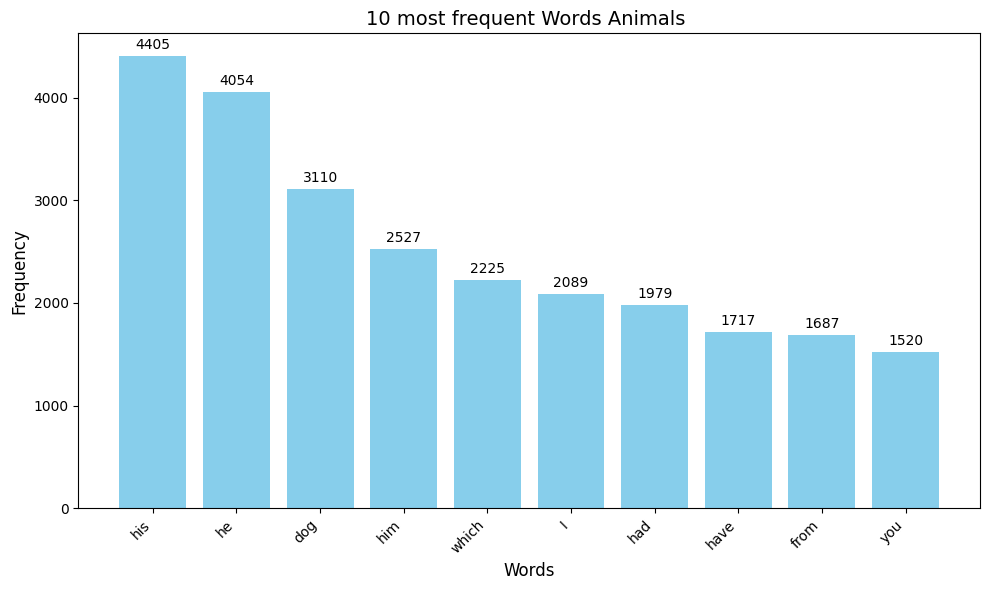

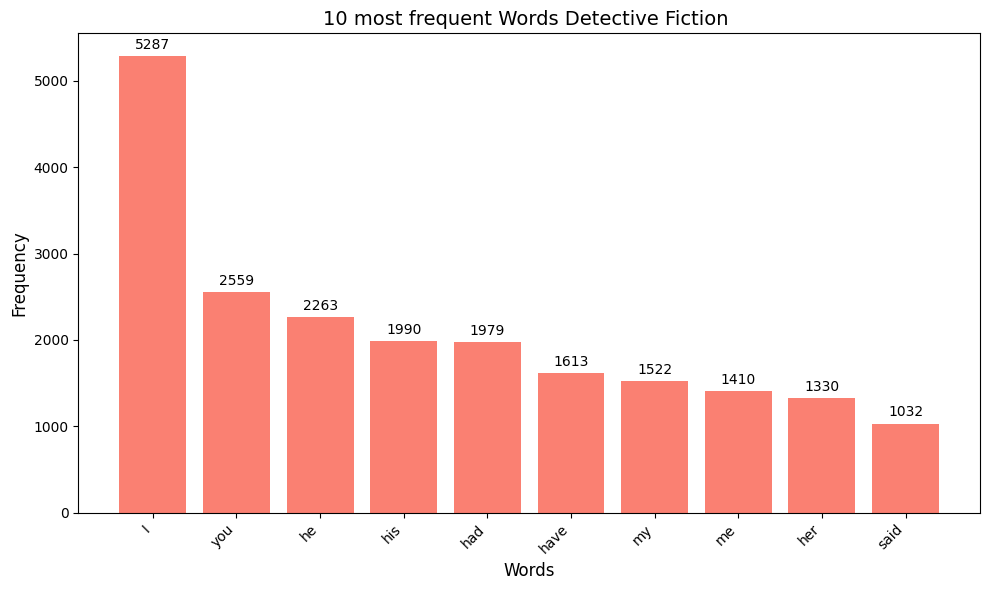

In [15]:
# Code for plotting the frequency distribution of words goes here
#plot for animals genre
plt.figure(figsize=(10, 6))
bars_animals_freq=plt.bar(words_animals, counts_animals, color='skyblue')
plt.bar_label(bars_animals_freq, padding=3)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('10 most frequent Words Animals ', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#plot for detective fiction genre
plt.figure(figsize=(10, 6))
bars_detective_freq=plt.bar(words_detective_fiction, counts_detective_fiction, color='salmon')
plt.bar_label(bars_detective_freq, padding=3)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('10 most frequent Words Detective Fiction ', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### TFIDF-based distribution

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document within a collection of documents. It is a widely used technique in text mining and information retrieval to quantify the relevance of words in a corpus.

TF-IDF is calculated by multiplying two components: Term Frequency (TF) and Inverse Document Frequency (IDF).

Term Frequency (TF): TF measures the frequency of a word in a specific document. It is calculated as the number of times a word appears in a document divided by the total number of words in that document. The formula for TF is: 

$$TF(t,d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}}$$

where $f_{t,d}$ is the number of occurrences of term $t$ in document $d$, and the denominator is the total number of terms in document $d$.

Inverse Document Frequency (IDF): IDF measures the importance of a word across the entire corpus. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the word. The formula for IDF is:

$$IDF(t) = \log \frac{N}{|{d \in D : t \in d}|}$$

where $N$ is the total number of documents in the corpus, and $|{d \in D : t \in d}|$ is the number of documents where term $t$ appears.

The TF-IDF score for a word in a document is the product of its TF and IDF values:

$$TF\text{-}IDF(t,d) = TF(t,d) \times IDF(t)$$

In this task, you will write code to plot the distribution of the top 10 words based on their TF-IDF scores. To calculate TF-IDF scores, you will need to slightly modify your preprocessing approach to preserve the concept of separate documents within your dataset. As previously mentioned, you can choose to use external libraries that provide TF-IDF functionality or implement your own TF-IDF calculation.

In [11]:
#TF-IDF Calculation
#loading the books as separate documents

animals_docs= read_books_as_documents("./data/books/animals")
detective_fiction_docs= read_books_as_documents("./data/books/detective_fiction")

# preprocess each doc
preprocessed_animals_docs = [preprocess(doc) for doc in animals_docs]
preprocessed_detective_fiction_docs = [preprocess(doc) for doc in detective_fiction_docs]

# preprocessing data for use TfidVectorizer(expects text not list of tokens)
animals_text=[' '.join(tokens) for tokens in preprocessed_animals_docs]
detective_fiction_text=[' '.join(tokens) for tokens in preprocessed_detective_fiction_docs]

# proceding to us tfidvecotrizer
from sklearn.feature_extraction.text import TfidfVectorizer

#ANIMALS 
vectorizer_animals = TfidfVectorizer()
tfid_animals_matrix = vectorizer_animals.fit_transform(animals_text) #fit and transform docs
feature_animals_words = vectorizer_animals.get_feature_names_out() # get feature words
tfid_scores_animals = tfid_animals_matrix.sum(axis=0).A1  # sum tf-idf scores for each word
animals_words_scores = list(zip(feature_animals_words, tfid_scores_animals)) # word-score pairs
top10_animals = sorted(animals_words_scores, key=lambda x: x[1], reverse=True)[:10] #sorting top 10 words and its score

#DETECTIVE FICTION
vectorizer_detective = TfidfVectorizer()
tfid_detective_matrix = vectorizer_detective.fit_transform(detective_fiction_text) #fit and transform docs
feature_detective_words = vectorizer_detective.get_feature_names_out() # get feature words
tfid_scores_detective = tfid_detective_matrix.sum(axis=0).A1  # sum tf-idf scores for each word
detective_words_scores = list(zip(feature_detective_words, tfid_scores_detective)) # word-score pairs
top10_detective = sorted(detective_words_scores, key=lambda x: x[1], reverse=True)[:10] #sorting top 10 words and its score


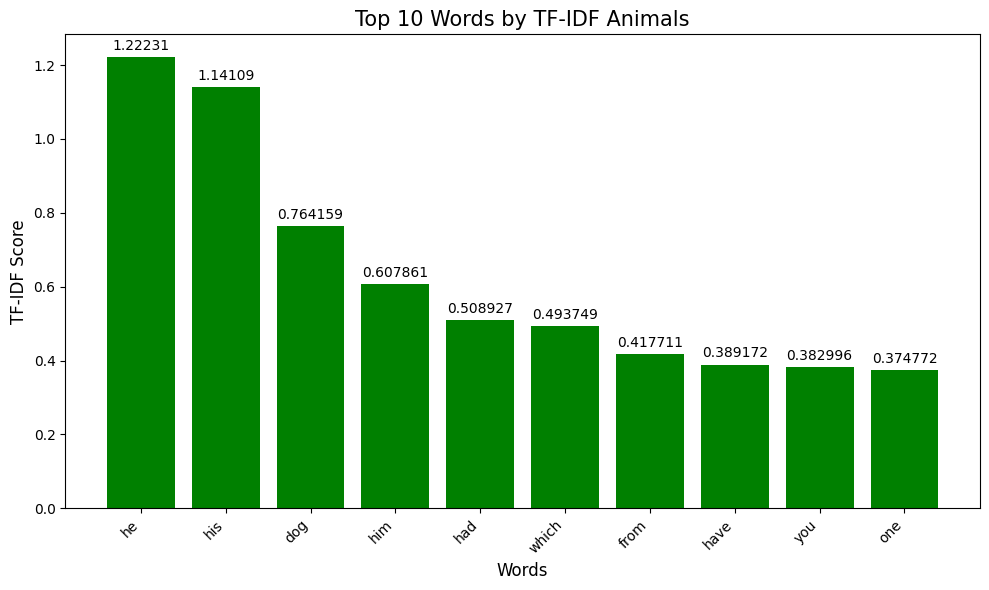

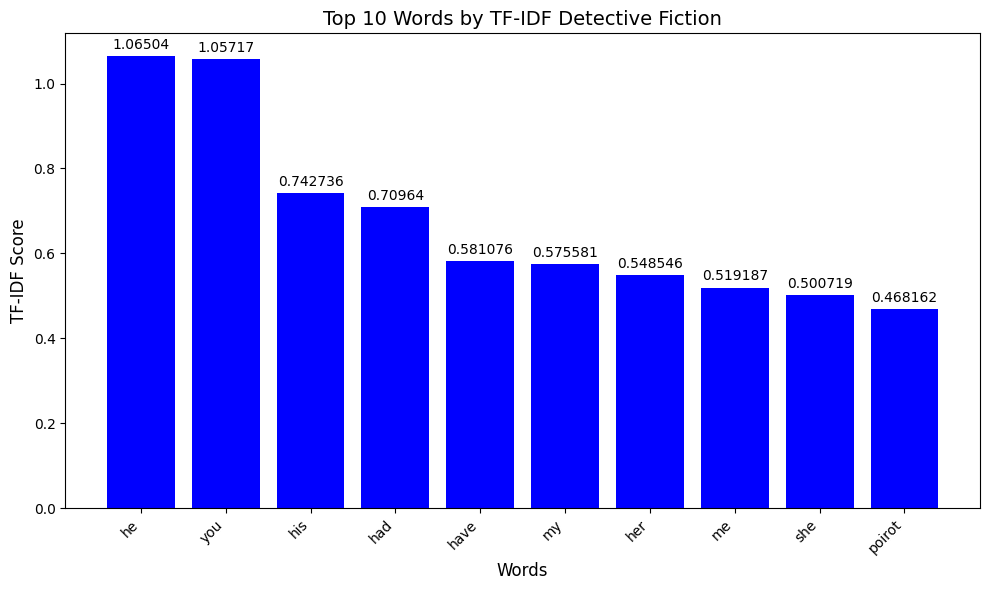

In [14]:
# Code for plotting the frequency distribution of words using TF-IDF goes here
# PLOT FOR ANIMALS
words_tfidf_animals = [word for word, score in top10_animals]
scores_tfidf_animals = [score for word, score in top10_animals]

plt.figure(figsize=(10, 6))
bars_animals_score = plt.bar(words_tfidf_animals, scores_tfidf_animals, color='green')
plt.bar_label(bars_animals_score, padding=3)
plt.xlabel('Words', fontsize=12)
plt.ylabel('TF-IDF Score', fontsize=12)
plt.title('Top 10 Words by TF-IDF Animals', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# PLOT FOR DETECTIVE FICTION
words_tfidf_detective = [word for word, score in top10_detective]
scores_tfidf_detective = [score for word, score in top10_detective]

plt.figure(figsize=(10, 6))
bars_detective_score = plt.bar(words_tfidf_detective, scores_tfidf_detective, color='blue')
plt.bar_label(bars_detective_score, padding=3)
plt.xlabel('Words', fontsize=12)
plt.ylabel('TF-IDF Score', fontsize=12)
plt.title('Top 10 Words by TF-IDF Detective Fiction', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Part 2: Text Classification

In this part of the assignment, you will explore the application of machine learning techniques for text classification. The task at hand is to train classifiers that can distinguish between spam and legitimate (ham) SMS messages.  You will use the APIs that are provided by `scikit-learn`.

In [16]:
# This cell should contain all import statements.
import pandas as pd

## Part 2.1: Data Preprocessing

First, load the CSV file `data/sms/sms_data.csv` into a Pandas dataframe.

In [ ]:
# Load the data here
df = pd.read_csv('data/sms/sms_data.csv')

                                                text label
0        Lol for real. She told my dad I have cancer   ham
1  Ok i will tell her to stay out. Yeah its been ...   ham
2  Do you want a new video handset? 750 anytime a...  spam
3  Yeah my usual guy's out of town but there're d...   ham
4  But I'm on a diet. And I ate 1 too many slices...   ham

Dataset shape: (4459, 2)

Label distribution:
label
ham     3861
spam     598
Name: count, dtype: int64


Complete the implementation of the `preprocess_sms` function that will be used for tokenization. This function should:  
- 1. Split the text into tokens.
- 2. Lowercase each token.
- 3. Exclude all stopwords from the list of tokens.
- 4. Returns the list of preprocessed tokens.

In [20]:
# Your implementation goes here.
def preprocess_sms(text: str) -> List[str]:
    """
    This function preprocess the SMS text for classification
    - input: a string containing the SMS text
    - output: a list of preprocessed tokens
    """
    #1 spliting white spaces
    tokens = text.split()

    #2 lowercasing
    tokens = [token.lower() for token in tokens]
    
    #3 removing stopwords
    with open("data/stopwords.txt", "r") as f:
        stopwords = set([line.strip() for line in f.readlines()])
    tokens = [token for token in tokens if token not in stopwords]
    
    return tokens


## Part 2.2: Training a Count-based BoW Models

In this part you will represent the data using a Bag of Words (BoW) approach. For this, you will use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class along with the function `preprocess_sms` function as a tokenizer. 

[1] “sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.17.1 documentation.” https://scikit-learn.org/0.17/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
[2] “CountVectorizer,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


# vectorizer for preprocessed fun
vectorizer = CountVectorizer(
    tokenizer=preprocess_sms,
    lowercase=False, #done in preprocess_sms
    token_pattern=None #custom tokenizer
)

# converting sms text into Bow Vectors
X = vectorizer.fit_transform(df['text'])
y = df['label']

print(X.shape)
print(len(vectorizer.get_feature_names_out()))  # Number of unique tokens/features

(4459, 11780)
11780


Split your data into a training and test sets of size 80% and 20% respectively. If your method invovles randomzation (e.g. shuffling) make sure to use the value 42 as a seed for reproducibility.  

Use the `train_test_split` function provided by scikit-learn.

[1] “train_test_split,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Your to split the data into training and testing sets goes here
from sklearn.model_selection import train_test_split

# reference [1], 80% training, 20% test for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Keep same spam/ham ratio in both sets
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Now, you should have your data ready to start training and evaluating a set of classifiers. Specifically, you will train a Linear Regression model and a simple one-layer MLP (Multilayer Perceptron) model. For the MLP model, you will need to run hyperparameter finetuning on at least two hyperparameters (e.g. learning rate, number of neurons in the hidden layer)

To evaluate the above classifiers, you need to report the following metrics:
- 1. F1 score
- 2. Precision
- 3. Recall

You will need to use the following APIs:  
- [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
- [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- The [`sklearn.metrics`](https://scikit-learn.org/1.5/api/sklearn.metrics.html) package that contain implementations of different classification metrics.

In [ ]:
# Your code to train a logistic regression model and evaluate its performance goes here
...

In [ ]:
# Your code to train an MLP model and evaluate its performance goes here
...

## Part 2.3: Training a TDIDF-based BoW Models

In this part, you will replicate the the steps of Part 1.2 with the exception of replacing the wordcount as a feature representation with TFIDF count. For this task, you will need to use the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class. The remainder of the classes is the same as the previous part.

In [ ]:
...